In [1]:
import pandas as pd
import networkx as nx
from tqdm import tqdm


# Question 1 - Data
In this question we are going to make three separated graphs and then making them weighted and merged

First, we simply load our three different datasets with using of `pandas`

In [2]:
#Loading our datasets via Pandas
col_names = ["user-u","user-v","timestamp"] #Column names
answers_questions = pd.read_csv("sx-stackoverflow-a2q.txt",sep=" ",names=col_names) #Loading a2q dataset
comments_answers = pd.read_csv("sx-stackoverflow-c2a.txt",sep=" ",names=col_names) #Loading c2a dataset
comments_questions = pd.read_csv("sx-stackoverflow-c2q.txt",sep=" ",names=col_names) #Loading c2q dataset

In [3]:
#Getting minimum and maximum timestamp of the these datasets
timestamp_aq = [answers_questions["timestamp"].max(),answers_questions["timestamp"].min()]
timestamp_ca = [comments_answers["timestamp"].max(),comments_answers["timestamp"].min()]
timestamp_cq = [comments_questions["timestamp"].max(),comments_questions["timestamp"].min()]
print(timestamp_aq)
print(timestamp_cq)
print(timestamp_ca)

[1457266693, 1217567877]
[1457273428, 1217633097]
[1457273420, 1217645529]


As we see,the minimum and maximum timestamps belong to the comments2questions dataset
Maximum date is: Sunday, March 6, 2016 2:10:20 PM
Minimnum date is: Saturday, August 2, 2008 2:52:09 AM

I choose the date of 2010/01/01 and 2010/03/01 to analyze
So our start_ts = 1262304000
And end_ts  = 1267401600

In [4]:
#Before that, we drop every data which the questionare answer it himself
temp_df  = answers_questions[answers_questions["user-u"] != answers_questions["user-v"]]
answers_questions = temp_df

In [5]:
#Now we are mask the dataframes again to drop anything outside of our desired timestamps
start_ts = 1262304000
end_ts = 1267401600
def FilterDataframeByTimestamp(df,start_ts,end_ts):
    return df[df["timestamp"].between(start_ts,end_ts)]

In [6]:
#Now using our above function to filter our datasets
#Filtering each dataset by start_ts and end_ts
answers_questions = FilterDataframeByTimestamp(answers_questions,start_ts,end_ts)
comments_answers = FilterDataframeByTimestamp(comments_answers,start_ts,end_ts)
comments_questions = FilterDataframeByTimestamp(comments_questions,start_ts,end_ts)

Now we define three different Direct Graphs using `networkx` module then we fill and then merge them

In [7]:
aq_graph = nx.DiGraph() #Graph for answers_questions
ca_graph = nx.DiGraph() #Graph for comments_answers
cq_graph = nx.DiGraph() #Graph for comments_questions

Here, I created a function which create new column which later I am going to counts the weight of each connection

In [8]:
#The function to create new column based on users columns
def AddWeight(row):
    return "{}-{}".format(row["user-u"],row["user-v"])
def GettingGraphWeights(df):
    df = df.drop("timestamp",axis=1)  #Dropping timestamp column
    df["weight"] = df.apply(lambda row: AddWeight(row),axis=1) #Applying AddWeight function to the dataframe
    return df["weight"].value_counts().to_dict() #Return a dict which contains the nodes with each weight


In [9]:
#The Python dicts which have nodes name with weights
aq_nodes = GettingGraphWeights(answers_questions) #Answers2Questions
ca_nodes = GettingGraphWeights(comments_answers) #Comments2Answers
cq_nodes = GettingGraphWeights(comments_questions) #Comments2Questions

In [10]:
aq_nodes #Just for demonstration purpose

{'95810-234322': 24,
 '20578-84201': 18,
 '20862-234322': 17,
 '54680-84201': 16,
 '138475-198729': 15,
 '54680-206446': 15,
 '157882-240698': 14,
 '70604-68183': 14,
 '58792-84201': 14,
 '187606-84201': 13,
 '203907-240698': 13,
 '139459-198729': 13,
 '19068-84201': 13,
 '179910-233254': 13,
 '89771-143030': 12,
 '58088-143030': 12,
 '70604-240698': 11,
 '6309-260654': 11,
 '139459-84201': 11,
 '152083-84201': 11,
 '203907-157027': 11,
 '241717-240698': 11,
 '20862-172637': 10,
 '123109-40725': 10,
 '184730-240698': 10,
 '143972-190822': 10,
 '157882-100516': 10,
 '153285-247265': 10,
 '87234-247265': 10,
 '70604-39677': 10,
 '128165-84201': 9,
 '187606-225269': 9,
 '61700-75500': 9,
 '70604-169277': 9,
 '139459-225269': 9,
 '171461-190822': 9,
 '36305-215234': 9,
 '54680-198729': 9,
 '138475-221023': 9,
 '187690-233254': 9,
 '105929-226897': 9,
 '227665-248901': 8,
 '70604-238134': 8,
 '106671-233254': 8,
 '237696-143030': 8,
 '172211-241717': 8,
 '30461-225253': 8,
 '115145-258863':

In [11]:
#Now I created another function which reads from each dict and add edge
def AddEdgeToGraph(graph,nodes):
    for n in tqdm(nodes.items()): #Iterating in the dict
        e = n[0].split("-") #Splitting
        graph.add_edge(e[0],e[1],weight=int(n[1])) #Adding edge with weight

AddEdgeToGraph(aq_graph,aq_nodes)
AddEdgeToGraph(ca_graph,ca_nodes)
AddEdgeToGraph(cq_graph,cq_nodes)

100%|██████████| 65131/65131 [00:00<00:00, 360726.44it/s]


In [12]:
#New we can merge these created graphs
G = nx.compose(aq_graph,cq_graph)
G = nx.compose(G,ca_graph) #Final graph

In [14]:
#Writing the final graph to a file
nx.write_gml(G,"graph.gml")

In [13]:
#DEBUG
G.edges(data=True) #Demonstrating the graph with weights

## Funcitonality 1

In [116]:
def functionality_1(graph):
    num_users = len(graph)
    num_links = len(cq_graph.edges)
    num_link_per_user = num_links / num_users

    # Graph density formula for directed graphs d/n*(n-1)
    graph_density = abs(num_links) / ( abs(num_users) * (abs(num_users) - 1) )
    
    density_threshold = 0.5

    #TODO directed
    directed_or_not = 'directed'

    print("The graph is:", directed_or_not)
    print("Number of users:", num_users)
    print("Number of answers/comments:", num_links)
    print("Average number of links per users:", num_link_per_user)
    print("Density degree of the graph:", graph_density)
    print("The graph is:", 'sparse' if graph_density < density_threshold else 'dense')

## Visualization 1

In [122]:
import matplotlib.pyplot as plt

In [128]:
def density_distribution_plot(graph):
    #TODO fix degrees funciton
    degrees = [graph.degree(n) for n in graph.nodes()]
    plt.hist(degrees)
    plt.title("Density distribution")
    plt.show()

In [132]:
# Select one of the three graph as input
input_graph = cq_graph

In [133]:
# Print all information requested
functionality_1(input_graph)

The graph is: directed
Number of users: 23843
Number of answers/comments: 65131
Average number of links per users: 2.7316612842343666
Density degree of the graph: 0.00011457349568972261
The graph is: sparse


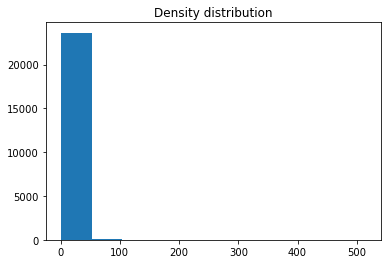

In [134]:
# Plot a density distribution of the input graph
density_distribution_plot(input_graph)

## Functionality 2

### Closeness centrality

In [187]:
def compute_closeness_centrality(graph, node):
    path = nx.single_source_dijkstra_path_length(graph, node)
    return (len(path) - 1) / sum(path.values()) * ((len(path) - 1) / (len(graph) - 1))

### Betweeness centrality

In [175]:
def compute_betweenness_centrality(graph, node):
    result_a = 0
    result_b = 0
    n = len(graph.nodes)
    normalization = 1/((n-1)*(n-2))

    for node_i in graph.nodes:
        for node_j in graph.nodes:
            path = nx.shortest_path(G, node_i, node_j)
            distance = len(path)

            if distance != 0:
                result_a += len(path)
                if node in path:
                    result_b += len(path)
            return normalization * (result_b/result_a)

### PageRank

In [176]:
def compute_pagerank(graph, node, alpha, page_rank_dict):
    
    # get parent nodes
    parents = graph.predecessors(node)

    # get children node
    children = graph.successors(node)
    # number of children nodes
    children_count = len(list(children))


    pagerank_value = 0 

    for i in parents:
        if children_count != 0:
            pagerank_value += page_rank_dict.get(node, 0) / children_count

    # update page_rank dict
    page_rank_dict[node] = alpha / len(graph) + (1 - alpha) * pagerank_value

In [177]:
def page_rank(graph, alpha=0.85, iterations = 30):
    # create a pagerank dict with nodes as keys and value inizialized as 1
    pagerank = dict.fromkeys(graph.nodes, 1)

    # nodes as list
    nodes = list(graph.nodes)

    # iterate n times to converge the pagerank value
    for _ in range(iterations):
        # iterate over nodes
        for n in nodes:
            # compute pagerank of node n and update its result
            compute_pagerank(graph, n, alpha, pagerank)
    return pagerank

In [179]:
def pagerank(graph, alpha, node):
    #return nx.pagerank(G)[node]
    return page_rank(G, 0.85, 10)[node]
    

### Functionality 2

In [180]:
#metric: 1 - Betweeness, 2 - PageRank, 3 - ClosenessCentrality
def functionality_2(graph, node, time_interval, metric):
    print('Node selected:', node)

    if metric == 1:
        betweenness = compute_betweenness_centrality(graph, node)
        print("Betweennes score is:", betweenness)


    elif metric == 2:
        page_rank_num = pagerank(graph, 0.85, node)
        print("PageRank score is:", page_rank_num)

    elif metric == 3:
        centrality = compute_closeness_centrality(graph, node)
        print("Closeness Centrality is:", centrality)

In [181]:
sample_node = '95810'

In [182]:
functionality_2(G, sample_node, None, 1)

Node selected: 95810
Betweennes score is: 3.351636052506792e-10


In [183]:
functionality_2(G, sample_node, None, 2)

Node selected: 95810
PageRank score is: 1.7591029832524846e-05


In [188]:
functionality_2(G, sample_node, None, 3)

Node selected: 95810
Closeness Centrality is: 0.24890583192030327
